Code used to sanity-check data: plotting raw and written files, calculating various statistics

# Plot NCAR Raw data

In [1]:
import zarr
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import os

In [2]:
# %matplotlib widget

In [3]:
# raw_ncar_folder_path = '/home/idies/workspace/turb/data02_02/ncar-low-rate-fixed-dt/'
raw_ncar_folder_path = '/home/idies/workspace/turbulence-ceph-staging/ncar-jhf/lr'
save_folder_path = '/home/idies/workspace/Storage/ariel4/persistent/ncar-zarr-code/zarr_reading/visualizations/'

chunk_size=64


var = 'e'
variable = var

# timestep_range = range(5) # This will definitely crash the Kernel
timestep_nr = 0

In [13]:
# needed for sciserver jobs
%cd /home/idies/workspace/Storage/ariel4/persistent/zarrify-across-network

/home/idies/workspace/Storage/ariel4/persistent/zarrify-across-network


In [14]:
# for timestep_nr in timestep_range:
#     data = xr.open_dataset(raw_ncar_folder_path + "/jhd.00" + str(timestep_nr) + ".nc")


data_xr = xr.open_dataset(raw_ncar_folder_path + "/jhf." + str(timestep_nr).zfill(3) + ".nc", chunks={'nnz': chunk_size, 'nny': chunk_size, 'nnx': chunk_size})

In [15]:
steps = range(0, data_xr['t'].shape[2], 10)

# for i, z in enumerate(z_steps):
#     print(i,z)

### Runtimes

3min 45s +- 4min(!) to load Array `np.array(data[var])`

33.3s to plot using in-memory numpy array (from above)

14min 17s +- 6min for loading data using `data_xr[var][slice]` every time

Skipping the np.array loading takes wayyy too long (>1h for 7 runs atm)

<font color="red">Use np.array(data_xr['e'].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))!! Only 15sec!</font>

In [16]:
# TODO make this into a function

z_indices = [0]
x_indices = [0]
# z_indices = [2047]
z = 0

# Change this to slice along a different axis
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))
# Load only 512x512
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.array(data_xr[var].isel(nnz=slice(0, 512), nny=slice(0, 512), nnx=z_indices))

slice_data = np.squeeze(slice_data)

In [17]:
slice_data.shape

(512, 512)

In [ ]:
# slice_data = slice_data[:512, :512]

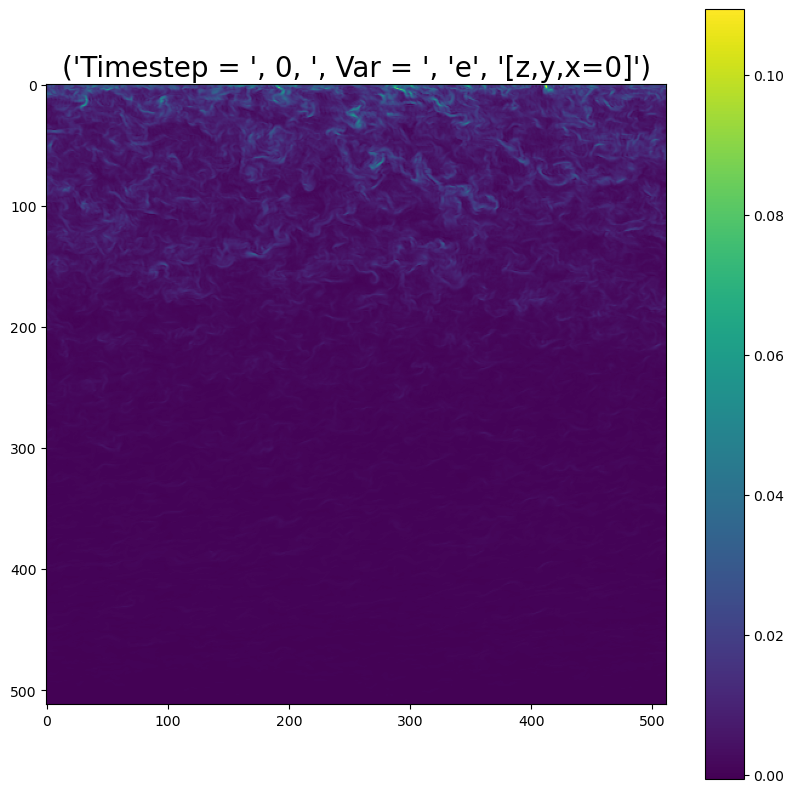

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y=" +str(y) + ",x]" # y
# name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z,y,x=" +str(z) + "]" # x

plt.title(name, fontsize=20)
plt.colorbar()

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

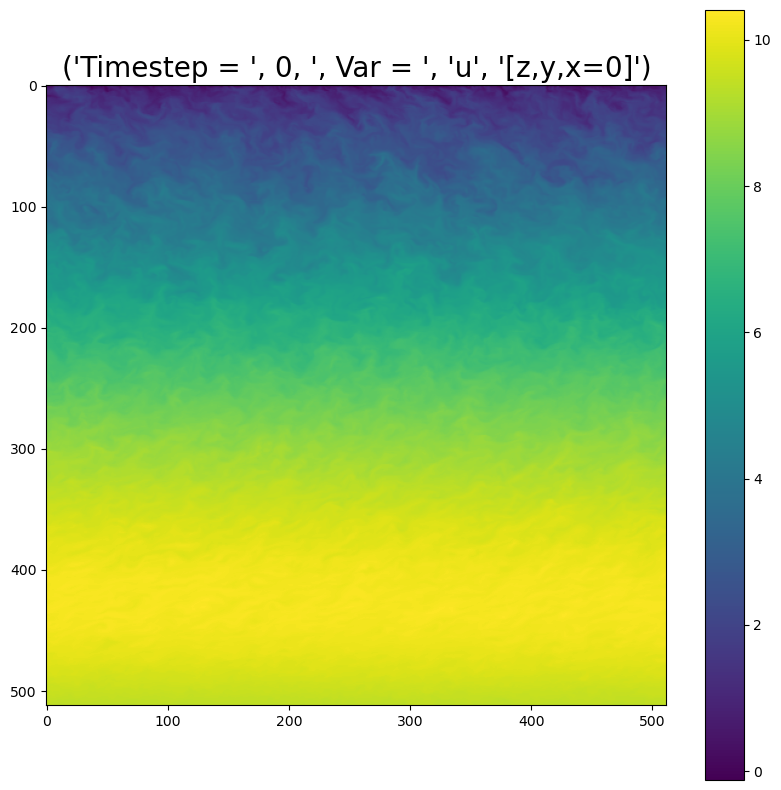

In [20]:
# TODO make this into a function
var = 'u'

z_indices = [0]
x_indices = [0]
# z_indices = [2047]
z = 0

# Change this to slice along a different axis
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))
# Load only 512x512
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.array(data_xr[var].isel(nnz=slice(0, 512), nny=slice(0, 512), nnx=z_indices))

slice_data = np.squeeze(slice_data)


plt.figure(figsize=(10,10))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y=" +str(y) + ",x]" # y
# name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z,y,x=" +str(z) + "]" # x

plt.title(name, fontsize=20)
plt.colorbar()

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

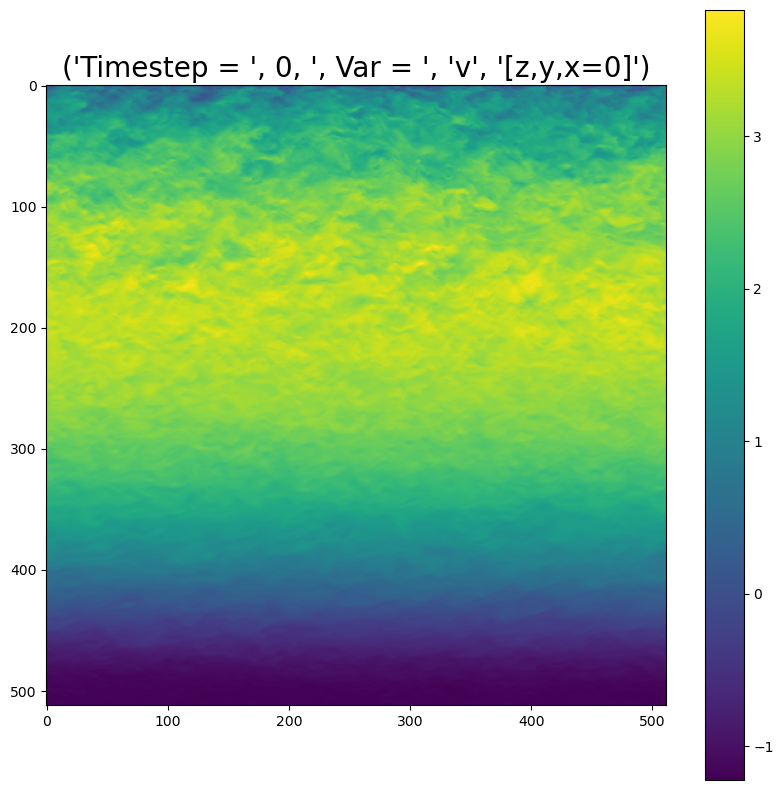

In [21]:
# TODO make this into a function
var = 'v'

z_indices = [0]
x_indices = [0]
# z_indices = [2047]
z = 0

# Change this to slice along a different axis
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))
# Load only 512x512
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.array(data_xr[var].isel(nnz=slice(0, 512), nny=slice(0, 512), nnx=z_indices))

slice_data = np.squeeze(slice_data)


plt.figure(figsize=(10,10))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y=" +str(y) + ",x]" # y
# name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z,y,x=" +str(z) + "]" # x

plt.title(name, fontsize=20)
plt.colorbar()

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

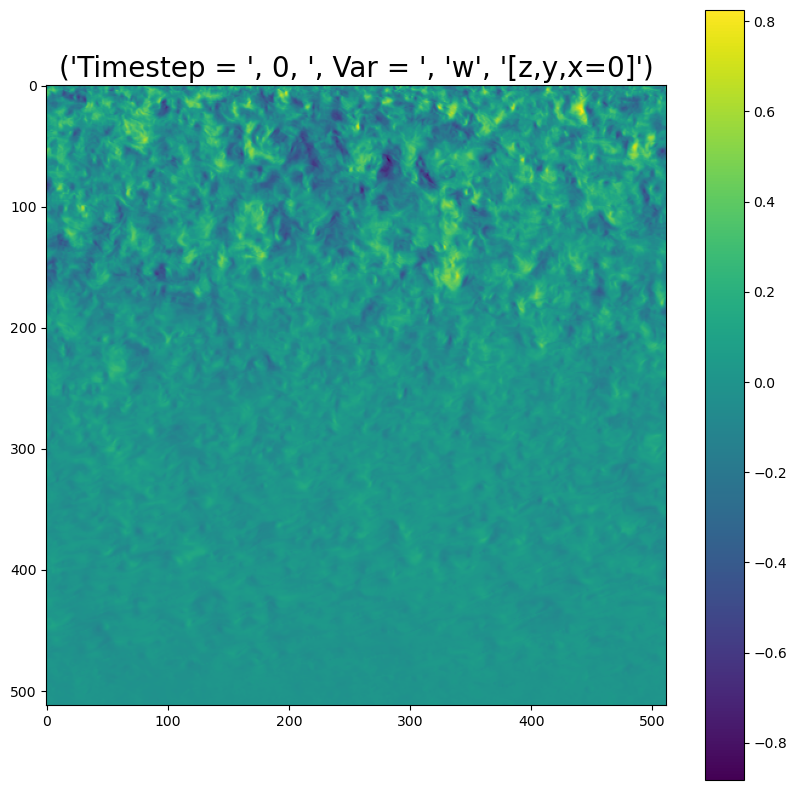

In [22]:
# TODO make this into a function
var = 'w'

z_indices = [0]
x_indices = [0]
# z_indices = [2047]
z = 0

# Change this to slice along a different axis
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))
# Load only 512x512
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.array(data_xr[var].isel(nnz=slice(0, 512), nny=slice(0, 512), nnx=z_indices))

slice_data = np.squeeze(slice_data)


plt.figure(figsize=(10,10))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y=" +str(y) + ",x]" # y
# name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z,y,x=" +str(z) + "]" # x

plt.title(name, fontsize=20)
plt.colorbar()

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

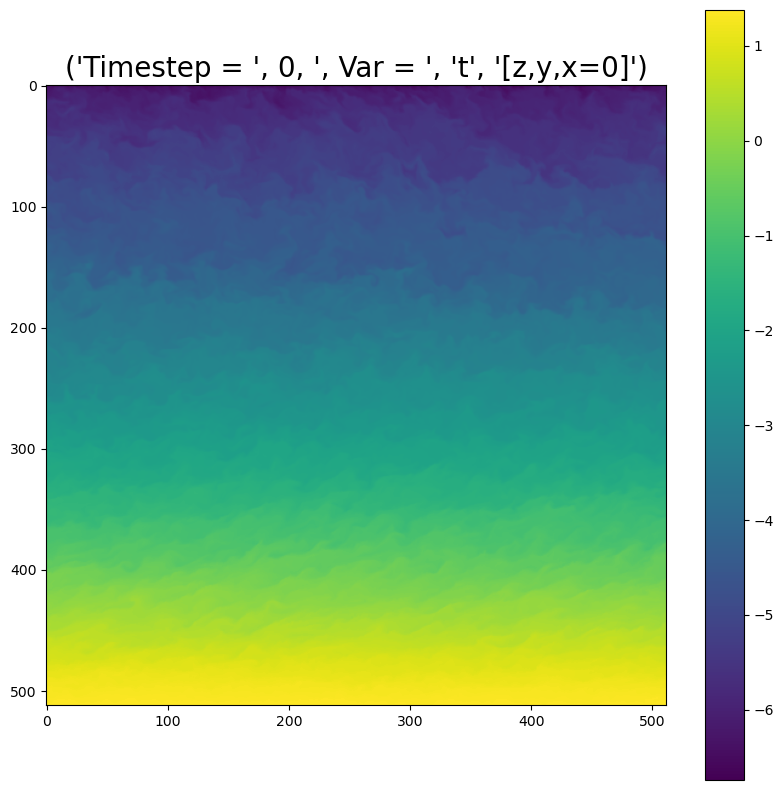

In [23]:
# TODO make this into a function
var = 't'

z_indices = [0]
x_indices = [0]
# z_indices = [2047]
z = 0

# Change this to slice along a different axis
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))
# Load only 512x512
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.array(data_xr[var].isel(nnz=slice(0, 512), nny=slice(0, 512), nnx=z_indices))

slice_data = np.squeeze(slice_data)


plt.figure(figsize=(10,10))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y=" +str(y) + ",x]" # y
# name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z,y,x=" +str(z) + "]" # x

plt.title(name, fontsize=20)
plt.colorbar()

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

# Plot Zarr Written data

## Newer NCAR StSABL (jhf)

In [1]:
stored_jhf_path = "/home/idies/workspace/turbulence-ceph-staging/sciserver-turbulence/stsabl2048low/stsabl2048low.zarr"

In [2]:
import zarr

ds = zarr.open(stored_jhf_path)

pressure_data = ds['pressure']

In [3]:
ds.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,4
No. arrays,4
No. groups,0
Arrays,"energy, pressure, temperature, velocity"


In [16]:
ds['velocity'].info

Name,/velocity
Type,zarr.core.Array
Data type,float32
Shape,"(20, 2048, 2048, 2048, 3)"
Chunk shape,"(1, 64, 64, 64, 3)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,2061584302080 (1.9T)
No. bytes stored,328


In [15]:
ds.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,4
No. arrays,4
No. groups,0
Arrays,"energy, pressure, temperature, velocity"


In [10]:
ds['energy'].shape

(20, 2048, 2048, 2048, 1)

### Data Statistics

In [13]:
list(ds.keys())

['energy', 'pressure', 'temperature', 'velocity']

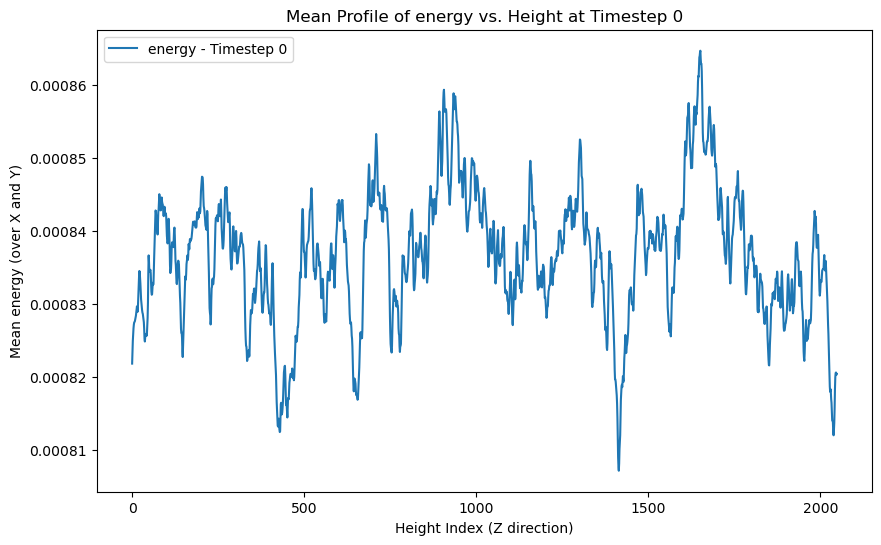

In [ ]:
import zarr
import dask.array as da
import matplotlib.pyplot as plt

# Assuming 'ds' is your zarr group already loaded
# ds = zarr.open_group('path_to_your_zarr_group', mode='r')  # You already have this

# Access the variables directly from 'ds'
energy_zarr = ds['energy']
pressure_zarr = ds['pressure']
temperature_zarr = ds['temperature']
velocity_zarr = ds['velocity']  # Shape: (20, 2048, 2048, 2048, 3)

# Wrap the Zarr arrays with Dask arrays
energy = da.from_array(energy_zarr)
pressure = da.from_array(pressure_zarr)
temperature = da.from_array(temperature_zarr)
velocity = da.from_array(velocity_zarr)

# Define axes indices (assuming dimensions are ordered as time, x, y, z, variables/components)
time_axis = 0
x_axis = 1
y_axis = 2
z_axis = 3
variable_axis = 4  # For scalar variables (size 1) and vector components (size 3)

# List of scalar variables and their Dask arrays
scalar_vars = {
    'energy': energy,
    'pressure': pressure,
    'temperature': temperature
}

## Handle Scalar Variables ##
for var_name, var_data in scalar_vars.items():
    # Remove the singleton dimension (variable_axis)
    var_data = var_data[..., 0]  # Slicing to remove the last dimension
    
    # Compute mean over X and Y (axes 1 and 2)
    mean_profile = var_data.mean(axis=(x_axis, y_axis))
    
    # Loop over timesteps
    for t in range(mean_profile.shape[time_axis]):
        # Extract mean profile for timestep t
        mean_profile_t = mean_profile[t, :]
        
        # Compute the mean profile (trigger computation)
        mean_profile_t_values = mean_profile_t.compute()
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(range(mean_profile_t_values.shape[0]), mean_profile_t_values, label=f"{var_name} - Timestep {t}")
        plt.xlabel("Height Index (Z direction)")
        plt.ylabel(f"Mean {var_name} (over X and Y)")
        plt.title(f"Mean Profile of {var_name} vs. Height at Timestep {t}")
        plt.legend()
        plt.show()

## Handle Velocity Components ##
velocity_components = ['u', 'v', 'w']

# Loop over components
for idx, comp_name in enumerate(velocity_components):
    # Extract the component data
    component_data = velocity[..., idx]
    
    # Compute mean over X and Y
    mean_profile = component_data.mean(axis=(x_axis, y_axis))
    
    # Loop over timesteps
    # for t in range(mean_profile.shape[time_axis]):
    
    # Compute only t=0
    t=0
    # TODO generalize
    # Extract mean profile for timestep t
    mean_profile_t = mean_profile[t, :]

    # Compute the mean profile
    mean_profile_t_values = mean_profile_t.compute()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(range(mean_profile_t_values.shape[0]), mean_profile_t_values, label=f"Velocity ({comp_name}) - Timestep {t}")
    plt.xlabel("Height Index (Z direction)")
    plt.ylabel(f"Mean Velocity ({comp_name}) (over X and Y)")
    plt.title(f"Mean Profile of Velocity Component '{comp_name}' vs. Height at Timestep {t}")
    plt.legend()
    plt.show()

### Slice Plotting

This can take a few minutes

In [23]:
from matplotlib import pyplot as plt

# Assuming ds is defined and contains the energy data
plt.figure(figsize=(20, 12))  # Set the figure size as large as possible
plt.imshow(ds['velocity'][0,:,:, 0, 1], aspect='auto')  # Display the image
plt.axis('off')  # Turn off the axes
plt.tight_layout()  # Adjust layout to use the space efficiently

# Save the figure to a file
plt.savefig('velocity_image.png', bbox_inches='tight', pad_inches=0, dpi=300)  # Adjust the filename and format as needed
plt.close()  # Close the plot

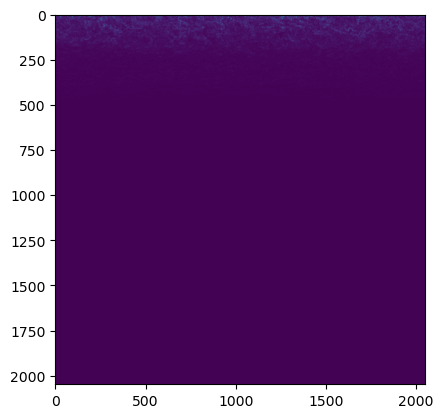

In [13]:
from matplotlib import pyplot as plt

plt.imshow(ds['energy'][0,:,:, 0, 0])

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(ds['energy'][0,:,:, 1024, 0])

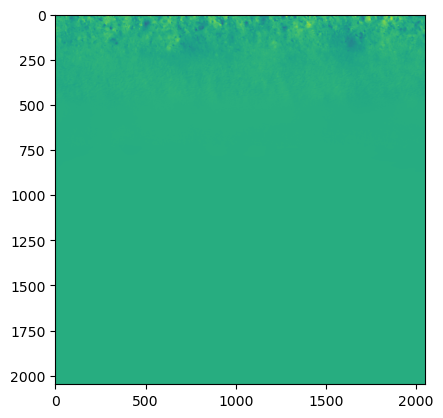

In [14]:
from matplotlib import pyplot as plt

plt.imshow(ds['pressure'][0,:,:, 0, 0])

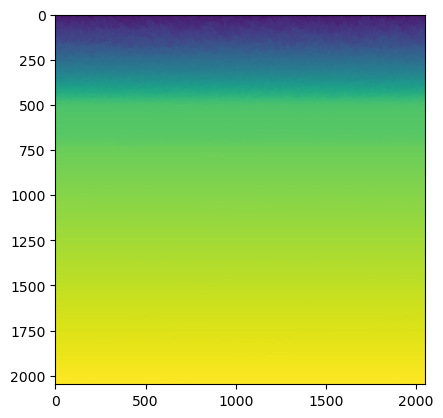

In [15]:
from matplotlib import pyplot as plt

plt.imshow(ds['temperature'][0,:,:, 0, 0])

In [18]:
ds['velocity'].shape

(20, 2048, 2048, 2048, 3)

In [22]:
ds['velocity'].info

Name,/velocity
Type,zarr.core.Array
Data type,float32
Shape,"(20, 2048, 2048, 2048, 3)"
Chunk shape,"(1, 64, 64, 64, 3)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,2061584302080 (1.9T)
No. bytes stored,328


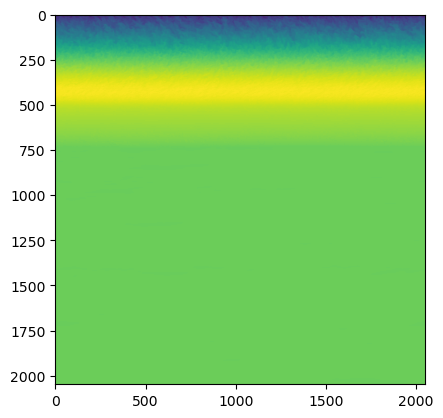

In [19]:
from matplotlib import pyplot as plt

plt.imshow(ds['velocity'][0,:,:, 0, 0])

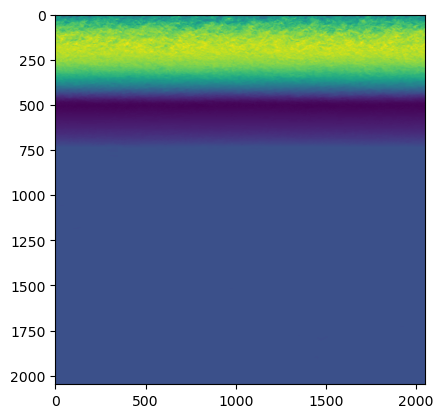

In [20]:
from matplotlib import pyplot as plt

plt.imshow(ds['velocity'][0,:,:, 0, 1])

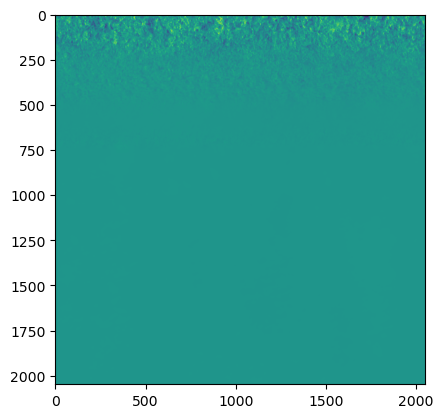

In [21]:
from matplotlib import pyplot as plt

plt.imshow(ds['velocity'][0,:,:, 0, 2])

## Original NCAR SABL (jhd)

In [ ]:
zarr_group = zarr.open_group('/home/idies/workspace/turb/data09_01/zarr/sabl2048b_09_prod/sabl2048b09_000.zarr', mode='r')
zarr_group.info

In [ ]:
zarr_xr = xr.open_zarr('/home/idies/workspace/turb/data09_01/zarr/sabl2048b_09_prod/sabl2048b09_000.zarr')

In [ ]:
slice_data = np.array(zarr_xr[variable].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.squeeze(slice_data)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y,x=" + str(x) + "]" # x
#     name = "[z,y=" +str(y) + ",x]" # y
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z

plt.title(name, fontsize=20)

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

### Plot both using Zarrify-Across-Network, to make chunk matching between original and zarr easy

For this, use Mike's getCutout